<a href="https://colab.research.google.com/github/alucatto/an_genero_enem/blob/main/G%C3%AAnero_no_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por que mulheres tiram notas menores no ENEM?

No Brasil há uma crescente preocupação com as diferenças e desigualdades de gênero para que seja possível diminuir e eliminar essa situação, que notoriamente prejudica mulheres, seja nos âmbitos pessoais ou profissionais.

O objetivo desta análise é, através dos dados do ENEM 2019, tentar compreender como o recorte de gênero pode explicar parte dessa desigualdade, a partir dos resultados das avaliações da Nota Total (soma de todas as notas) e do perfil dos candidatos.

##Configuração inicial do Notebook

### Bibliotecas computacionais

A seguir estão listadas as bibliotecas computacionais utilizadas ao longo desta análise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from matplotlib import gridspec

E, a seguir, foram definidos o estilo e a paleta de cores utilizados nos gráficos.

In [34]:
cores = ['#7B8C86','#D98B79', '#D9B4A7', '#D9BEA7','#AABFB2']

sns.set_palette(sns.color_palette(cores))

palheta = sns.color_palette()

palheta

[(0.4823529411764706, 0.5490196078431373, 0.5254901960784314),
 (0.8509803921568627, 0.5450980392156862, 0.4745098039215686),
 (0.8509803921568627, 0.7058823529411765, 0.6549019607843137),
 (0.8509803921568627, 0.7450980392156863, 0.6549019607843137),
 (0.6666666666666666, 0.7490196078431373, 0.6980392156862745)]

In [14]:
sns.set_style("dark")
sns.set_context('paper')

### Funções

Nesta seção definimos as funções computacionais utilizadas ao longo da análise.

In [5]:
def boxplotnotaxrenda(coluna, dd, titulo='', matiz = None):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x="Q006", y = coluna, data = dd, hue=matiz, order = renda_ordenada)
  plt.title("Distribuição da Nota Total pela renda" + titulo)
  plt.xticks(range(len(texto_renda)), texto_renda, rotation=80)

In [7]:
def plotdistribuicaonota(dd, titulo):
  fig = plt.figure(figsize=(12,4))
  spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[2, 1])

  ax0 = fig.add_subplot(spec[0])
  ax1 = fig.add_subplot(spec[1])

  ax0.set_title("Histograma da Nota Total x Gênero" + titulo, fontsize='x-large')

  sns.histplot(dd, x='NU_NOTA_TOTAL', hue='TP_SEXO', stat='density', kde=True,
              hue_order=['M','F'], ax=ax0)


  ax1.set_title("Boxplot da Nota Total x Gênero" + titulo, fontsize='x-large')

  sns.boxplot(x = 'TP_SEXO',y ="NU_NOTA_TOTAL", data = dd, order=['M', 'F'], ax=ax1)

  ax1.text(0, dd.query("TP_SEXO == 'M'")['NU_NOTA_TOTAL'].median(), 
          dd.query("TP_SEXO == 'M'")['NU_NOTA_TOTAL'].median(), color='lightgray', 
          fontweight='bold', ha='center', va='center')
  ax1.text(1, dd.query("TP_SEXO == 'F'")['NU_NOTA_TOTAL'].median(), 
          dd.query("TP_SEXO == 'F'")['NU_NOTA_TOTAL'].median(), color='lightgray', 
          fontweight='bold', ha='center', va='center')

##Dados

Nossa análise será realizada utilizando como fonte uma amostra estatística dos dados do ENEM 2019, considerando apenas os candidatos que realizaram ao menos uma prova.

###Leitura do Dataset

In [8]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


### Definição de variáveis

Nesta seção definimos as variáveis que utilizam os dados do dataset e que foram utilizadas ao longo da análise.

In [9]:
#define o vetor com todas as provas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

#define um vetor com a renda salarial ordenada de menor para o maior
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

#inclui a soma das notas na coluna NU_NOTA_TOTAL
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

#cria um dataset com pessoas que foram em pelo menos uma prova
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

In [10]:
#Vetor com a renda salarial ordenada em formato de texto
texto_renda=['Nenhuma renda', 'Até R$1 mil', 'De R\$1 mil a R\$1,5 mil', 'De R\$1,5 mil a R\$2 mil', 'De R\$2 mil a R\$2,5 mil',
             'De R\$2,5 mil a R\$3 mil', 'De R\$3 mil a R\$4 mil', 'De R\$4 mil a R\$5 mil', 'De R\$5 mil a R\$6 mil',
             'De R\$6 mil a R\$7 mil', 'De R\$7 mil a R\$8 mil', 'De R\$8 mil a R\$9 mil', 'De R\$9 mil a R\$10 mil', 
             'De R\$10 mil a R\$12 mil', 'De R\$12 mil a R\$15 mil', 'De R\$15 mil a R\$20 mil', 'Acima de R$20 mil']

<small>Classes por renda familiar:

* <small>A: Nenhuma renda
* B: Até R\$ 998,00
* C: De R\$ 998,01 até R\$ 1.497,00.
* D: De R\$ 1.497,01 até R\$ 1.996,00.
* E: De R\$ 1.996,01 até R\$ 2.495,00.
* F: De R\$ 2.495,01 até R\$ 2.994,00.
* G: De R\$ 2.994,01 até R\$ 3.992,00.
* H: De R\$ 3.992,01 até R\$ 4.990,00.
* I: De R\$ 4.990,01 até R\$ 5.988,00.
* J: De R\$ 5.988,01 até R\$ 6.986,00.
* K: De R\$ 6.986,01 até R\$ 7.984,00.
* L: De R\$ 7.984,01 até R\$ 8.982,00.
* M: De R\$ 8.982,01 até R\$ 9.980,00.
* N: De R\$ 9.980,01 até R\$ 11.976,00.
* O: De R\$ 11.976,01 até R\$ 14.970,00.
* P: De R\$ 14.970,01 até R\$ 19.960,00.
* Q: Mais de R\$ 19.960,00.

In [11]:
distrendabr = dados_sem_notas_zero["Q006"].value_counts() #quantidade de pessoas por classe economica no Brasil

# Analisando os dados por gênero

Considerando que a população brasileira tem uma relação de 51% de mulheres e 49% de homens$^1$, é possivel identificar uma discrepância nesta relação entre as pessoas que prestaram o ENEM em 2019: 60% de mulheres e 40% de homens.

<small> $^1$Fonte: https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html

In [12]:
propEnem = dados_sem_notas_zero['TP_SEXO'].value_counts(normalize=True)

Text(1, 0.5461025473945712, '0.6')

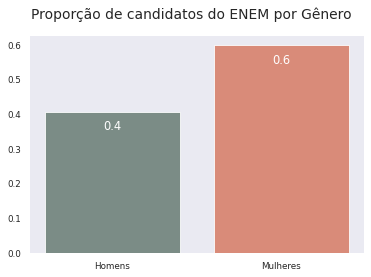

In [27]:
plt.bar(['Homens','Mulheres'], [propEnem['M'], propEnem['F']], color=palheta) 
plt.suptitle('Proporção de candidatos do ENEM por Gênero', fontsize='x-large')
plt.text(0, propEnem['M']-0.05, round(propEnem['M'],2), color='white', ha="center", fontsize='large')
plt.text(1, propEnem['F']-0.05, round(propEnem['F'],2), color='white', ha="center", fontsize='large')

### Nota Total por gênero

Avaliando a distribuição da Nota Total do país com o recorte de gênero, temos que em geral as mulheres apresentaram notas levemente mais baixas que os homens.

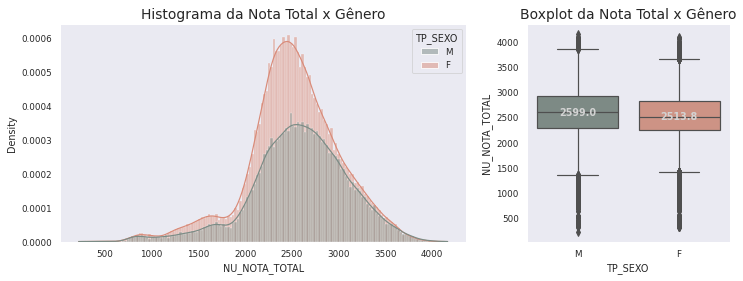

In [16]:
plotdistribuicaonota(dados_sem_notas_zero, '')

Mas por que isso acontece?

Para buscar essa resposta, vamos analisar o impacto da classe econômica dos candidatos na Nota Total.

## Classe econômica

Se olharmos a distribuição da Nota Total dos candidatos de acordo com a sua classe econômica, notamos que existe uma forte correlação entre a classe econômica do candidato e a sua nota no ENEM, conforme evidenciado no gráfico abaixo, onde as classes econômicas estão divididas conforme a renda familiar dos candidatos.

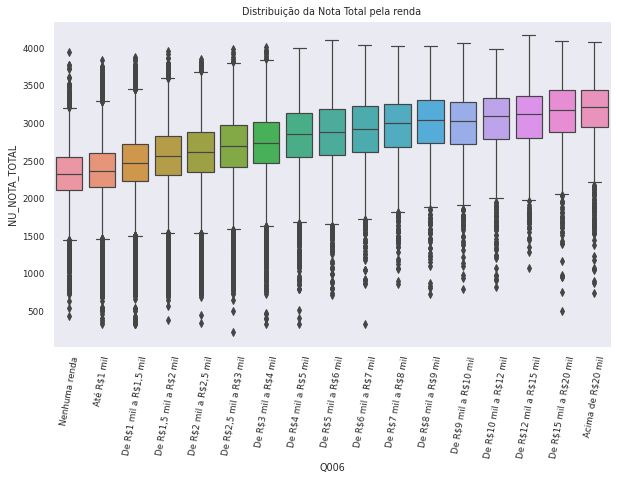

In [36]:
boxplotnotaxrenda("NU_NOTA_TOTAL",dados_sem_notas_zero)

Refazendo este gráfico, porém inserindo o recorte de gênero, fica evidente que a desigualdade de gênero é maior nas classes com renda familiar mais baixa.

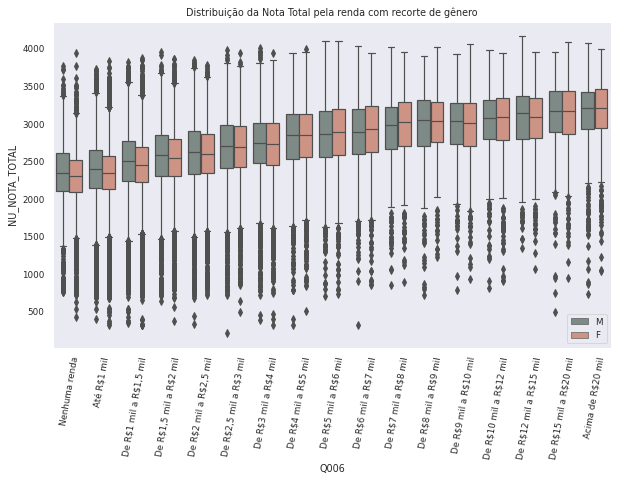

In [28]:
boxplotnotaxrenda("NU_NOTA_TOTAL",dados_sem_notas_zero, matiz="TP_SEXO", titulo=' com recorte de gênero')
plt.legend(loc='lower right')

Nas classes onde a renda familiar é inferior a R$1,5 mil, há uma tendência de que as mulheres tenham nota mais baixas que os homens.

No entanto, a partir da faixa de renda familiar maior que R$2,5 mil, as mulheres passam a apresentar resultados igualitários ou até superior ao dos homens.

De agora em diante denominaremos o grupo onde a renda familiar é menor que R$ 1,5 mil de Grupo "Renda Baixa", que será o enfoque de nossa análise.

E como esses candidatos estão divididos nessas classes econômicas?

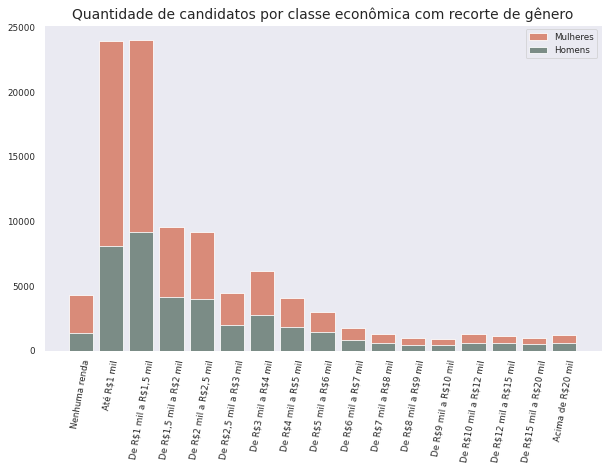

In [18]:
plt.figure(figsize=(10,6))

plt.bar(renda_ordenada, dados_sem_notas_zero["Q006"].value_counts().sort_index(), label='Mulheres', color=palheta[1])
plt.bar(renda_ordenada, dados_sem_notas_zero.query("TP_SEXO == 'M'")["Q006"].value_counts().sort_index(), label='Homens', 
        color=palheta[0])

plt.title('Quantidade de candidatos por classe econômica com recorte de gênero', fontsize='x-large')
plt.xticks(range(len(texto_renda)), texto_renda, rotation=80)
plt.legend()

Aqui vemos que a grande maioria dos candidatos faz parte do Grupo "Renda Baixa" e que a discrepância na proporção entre gêneros também é maior neste grupo, o que fica evidente se analisarmos o gráfico da proporção de mulheres em cada classe econômica a seguir.

In [19]:
 #quantidade de mulheres no Brasil, dividido por renda
 distrendaMul = dados_sem_notas_zero.query('TP_SEXO == "F"')["Q006"].value_counts()

In [20]:
distr_renda_mul_prop=distrendaMul/distrendabr #proporção da quantidade de mulheres, dividido por renda

In [21]:
 #quantidade de homens no Brasil, dividido por renda
 distrendaHom = dados_sem_notas_zero.query('TP_SEXO == "M"')["Q006"].value_counts()

distr_renda_hom_prop=distrendaHom/distrendabr #proporção da quantidade de homens, dividido por renda

([<matplotlib.axis.XTick at 0x7fc7bfb3e550>,
 [Text(0, 0, 'Nenhuma renda'),
  Text(0, 0, 'Até R$1 mil'),
  Text(0, 0, 'De R\\$1 mil a R\\$1,5 mil'),
  Text(0, 0, 'De R\\$1,5 mil a R\\$2 mil'),
  Text(0, 0, 'De R\\$2 mil a R\\$2,5 mil'),
  Text(0, 0, 'De R\\$2,5 mil a R\\$3 mil'),
  Text(0, 0, 'De R\\$3 mil a R\\$4 mil'),
  Text(0, 0, 'De R\\$4 mil a R\\$5 mil'),
  Text(0, 0, 'De R\\$5 mil a R\\$6 mil'),
  Text(0, 0, 'De R\\$6 mil a R\\$7 mil'),
  Text(0, 0, 'De R\\$7 mil a R\\$8 mil'),
  Text(0, 0, 'De R\\$8 mil a R\\$9 mil'),
  Text(0, 0, 'De R\\$9 mil a R\\$10 mil'),
  Text(0, 0, 'De R\\$10 mil a R\\$12 mil'),
  Text(0, 0, 'De R\\$12 mil a R\\$15 mil'),
  Text(0, 0, 'De R\\$15 mil a R\\$20 mil'),
  Text(0, 0, 'Acima de R$20 mil')])

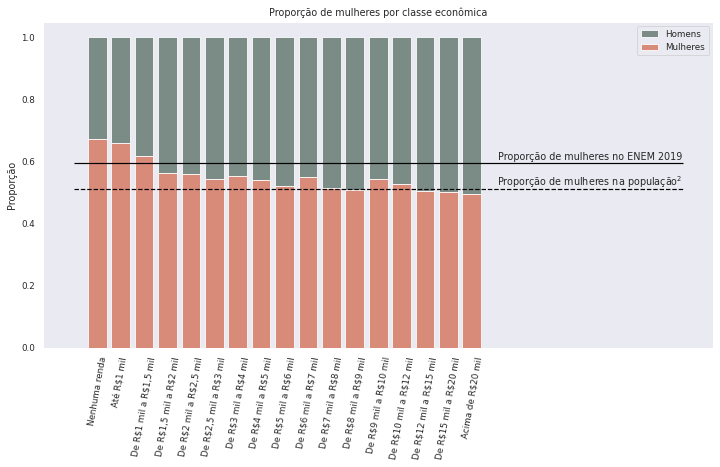

In [22]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(renda_ordenada, distr_renda_hom_prop.sort_index(), bottom=distr_renda_mul_prop, label='Homens', 
       color=palheta[0])
ax.bar(renda_ordenada, distr_renda_mul_prop.sort_index(), label='Mulheres', color=palheta[1])


ax.hlines(propEnem['F'], -1, 25) #proporção média de mulheres no ENEM
ax.text(25, propEnem['F']+0.01, 'Proporção de mulheres no ENEM 2019', horizontalalignment = 'right')

ax.hlines(0.51, -1, 25, linestyles='dashed') #proporção média de população feminina
ax.text(25, 0.52, 'Proporção de mulheres na população$^2$', horizontalalignment = 'right')

ax.set_ylabel('Proporção')
ax.set_title('Proporção de mulheres por classe econômica')
ax.legend()

plt.xticks(range(len(texto_renda)), texto_renda, rotation=80)
#ax.set_xticklabels(range(len(texto_renda)), texto_renda, rotation=80)

<small> $^2$Fonte: https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html

Aqui vemos que existe uma presença consideravelmente maior de candidatas mulheres nas classes econômicas mais baixas.

Por isso, não podemos fazer análise com recorte de gênero sem considerar a classe econômica.

E quem são essas mulheres das classes econômicas mais baixas?

Para complementar esta análise, vamos olhar com mais detalhe para esse grupo, começando por descobrir em que Estado elas moram.

Para isso, vamos olhar a distribuição de mulheres do Grupo "Renda Baixa" por Estado.

In [23]:
mulheres_classe = pd.DataFrame()
mulheres_classe["A"] = dados_sem_notas_zero.query("TP_SEXO == 'F'" and "Q006 == 'A'")["SG_UF_RESIDENCIA"].value_counts()
mulheres_classe["B"] = dados_sem_notas_zero.query("TP_SEXO == 'F'" and "Q006 == 'B'")["SG_UF_RESIDENCIA"].value_counts()
mulheres_classe["C"] = dados_sem_notas_zero.query("TP_SEXO == 'F'" and "Q006 == 'C'")["SG_UF_RESIDENCIA"].value_counts()

mulheres_classe.head()

,A,B,C
BA,572,2834,1991
CE,373,2459,1507
MA,360,1786,1117
PE,355,2055,1345
PA,352,2139,1513


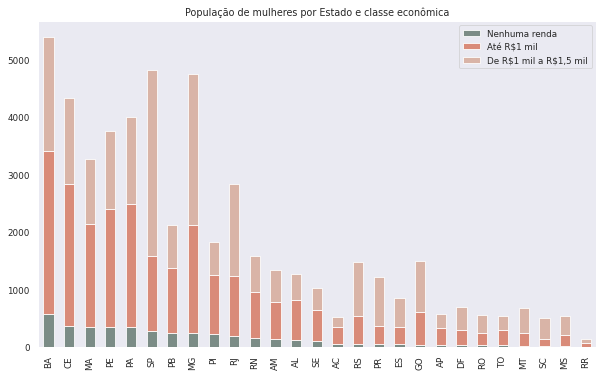

In [24]:
mulheres_classe.sort_values(by=['A', 'B', 'C'], ascending=False).plot(kind='bar', stacked=True, color=palheta, 
                                                                                figsize=(10,6), 
                                                                      title='População de mulheres por Estado e classe econômica')
plt.legend(['Nenhuma renda', 'Até R$1 mil', 'De R\$1 mil a R\$1,5 mil'])

Neste gráfico vemos que a maior quantidade de mulheres de classe baixa se concentra na Região Nordeste do pais, principalmente no Estado da Bahia.

Por isso, vamos analisar os dados deste Estado com mais detalhe.

## Bahia e seus aspectos econômicos e de gênero

### Dados da Bahia

In [37]:
dados_BA = dados_sem_notas_zero.query('SG_UF_RESIDENCIA == "BA"')

dados_BA.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
1529,190001063482,2019,2927408,Salvador,29,BA,42,F,1,3,1,1501402.0,Belém,15.0,PA,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BDCAA99999BBCCBDEAAECADBDAAADCACDBDCCAEEBDECEC...,CBBECDDBCCACEBDCABDCADEDBCBCAEDBCEAABDCBACBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,100.0,120.0,60.0,520.0,E,E,B,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2319.2
2578,190001106992,2019,2911105,Formosa do Rio Preto,29,BA,21,F,1,3,1,2700706.0,Batalha,27.0,AL,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DBBCDDCCCBACDEBCBDEBDCBADBBDDCACCAAEADBCB...,BBBCBCDCCCECBECECCBCDDEDBBDDCCECDEBECECABCCCA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,80.0,60.0,100.0,0.0,340.0,B,B,A,A,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,2000.0
2823,190001116919,2019,2911105,Formosa do Rio Preto,29,BA,20,M,1,1,2,NaN,NaN,NaN,NaN,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CEAAEACCDEEABDAADEEDBDBEAECC*DAEBEDBCAEAA...,EADECBADDCDEABEABDEACEBBCDADEACEBCEBEABCCEABD,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,100.0,100.0,560.0,D,D,A,A,7,B,A,B,D,B,B,B,A,B,A,A,A,A,B,A,A,D,A,A,B,2470.8
2826,190001117082,2019,2911105,Formosa do Rio Preto,29,BA,18,F,1,4,1,2903201.0,Barreiras,29.0,BA,2,0,2,1.0,0,29526604.0,2911105.0,Formosa do Rio Preto,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,DEABE99999DABCBBEACEDADEBECADEAECDEBCCDBABDDCA...,DEEEACDACAEBDADACBEAEEEDDCEBDEDEDDBDCABEDAEDC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,140.0,120.0,120.0,620.0,C,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2322.4
5499,190001219898,2019,2915601,Itamaraju,29,BA,16,F,1,3,1,2915601.0,Itamaraju,29.0,BA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999AEAABCCBAEBDAAAAACECEEECABECCCACBDAAEDBBA...,AABACBEBDCDCBBBDADBDCECDAEBECAADEBABCABACDBCB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,100.0,100.0,120.0,80.0,520.0,B,E,A,B,4,B,A,B,C,B,B,B,B,A,A,A,A,A,B,A,A,E,A,B,B,2514.3


In [38]:
distrendaba = dados_BA["Q006"].value_counts() #quantidade de pessoas da BA divididos por classe social
distr_renda_ba_prop=distrendaba/distrendabr # para uma dada classe, proporção que mora na BA

### Análise de gênero na Bahia

Vemos que a diferença proporcional entre homens e mulheres fazendo ENEM na Bahia é ainda maior que olhando o Brasil como um todo.

In [39]:
propEnemBA = dados_BA['TP_SEXO'].value_counts(normalize=True)

Text(1, 0.5829870129870129, '0.63')

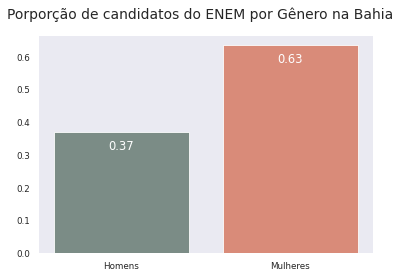

In [40]:
plt.bar(['Homens','Mulheres'], [propEnemBA['M'], propEnemBA['F']], color=palheta) 
plt.suptitle('Porporção de candidatos do ENEM por Gênero na Bahia', fontsize='x-large')
plt.text(0, propEnemBA['M']-0.05, round(propEnemBA['M'],2), color='white', ha="center", fontsize='large')
plt.text(1, propEnemBA['F']-0.05, round(propEnemBA['F'],2), color='white', ha="center", fontsize='large')

Comparando a distribuição das notas da Bahia com a distribuição das notas no Brasil, vemos que as primeiras possuem uma mediana levemente menor, mas que replicam seu comportamento.

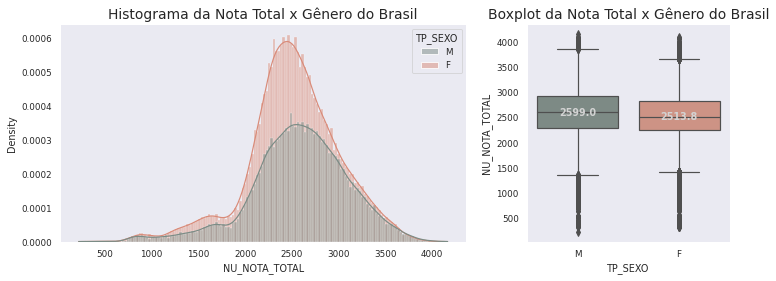

In [41]:
plotdistribuicaonota(dados_sem_notas_zero, ' do Brasil')

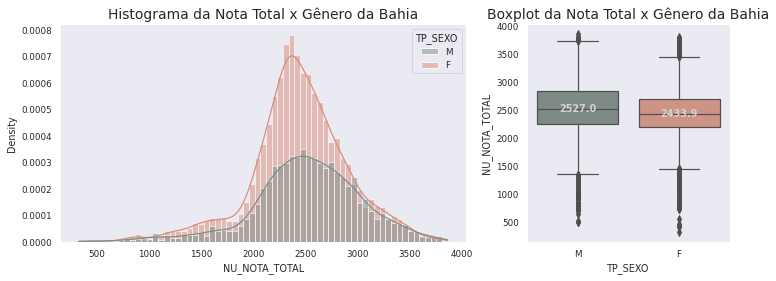

In [42]:
plotdistribuicaonota(dados_BA, ' da Bahia')

Neste caso,  as mulheres continuam apresentando notas levemente menores que os homens.

E como as notas dessas pessoas estão distribuídas considerando suas classes econômicas?

### Classe econômica e Nota Total na Bahia

Nesta análise vemos que a tendência de mulheres com notas menores é presente apenas no Grupo "Renda Baixa", passando a ser mais igualitárias na classe com renda familiar maior que R$1,5 mil.

([<matplotlib.axis.XTick at 0x7fc7bf1e71d0>,
 [Text(0, 0, 'Nenhuma renda'),
  Text(0, 0, 'Até R$1 mil'),
  Text(0, 0, 'De R\\$1 mil a R\\$1,5 mil'),
  Text(0, 0, 'De R\\$1,5 mil a R\\$2 mil'),
  Text(0, 0, 'De R\\$2 mil a R\\$2,5 mil'),
  Text(0, 0, 'De R\\$2,5 mil a R\\$3 mil'),
  Text(0, 0, 'De R\\$3 mil a R\\$4 mil'),
  Text(0, 0, 'De R\\$4 mil a R\\$5 mil'),
  Text(0, 0, 'De R\\$5 mil a R\\$6 mil'),
  Text(0, 0, 'De R\\$6 mil a R\\$7 mil'),
  Text(0, 0, 'De R\\$7 mil a R\\$8 mil'),
  Text(0, 0, 'De R\\$8 mil a R\\$9 mil'),
  Text(0, 0, 'De R\\$9 mil a R\\$10 mil'),
  Text(0, 0, 'De R\\$10 mil a R\\$12 mil'),
  Text(0, 0, 'De R\\$12 mil a R\\$15 mil'),
  Text(0, 0, 'De R\\$15 mil a R\\$20 mil'),
  Text(0, 0, 'Acima de R$20 mil')])

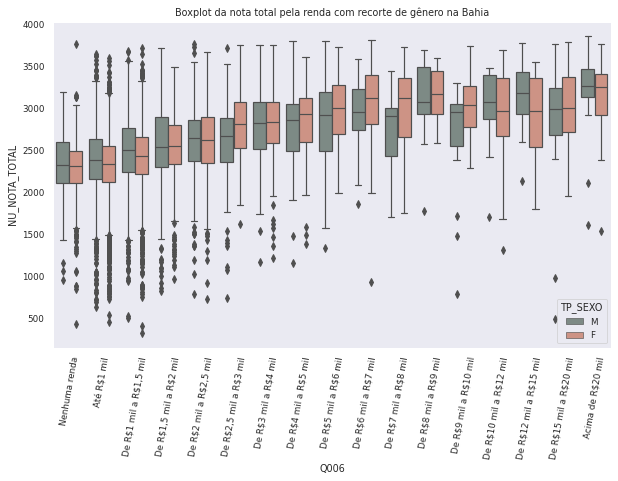

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_BA, hue="TP_SEXO", order = renda_ordenada, hue_order=['M', 'F'])
plt.title("Boxplot da nota total pela renda com recorte de gênero na Bahia")
plt.xticks(range(len(texto_renda)), texto_renda, rotation=80)

<small> OBS: Os dados das classes com renda familiar superior a R$5 mil devem ser desprezados nesta análise por não apresentarem mais representatividade estatística. No entanto, isto não afeta a nossa análise por não estarmos analisando as classes superiores, pois estas apresentaram igualdade nos dados nacionais.

Olhando para o Brasil no geral, notas mais próximas entre homens e mulheres começam a aparecer em grupos de renda superiroes a R\$2,5 mil, enquanto na Bahia as notas mais iguais já são vistas a partir de R\$1,5 mil, ou seja, no limite do Grupo "Renda Baixa".

Este efeito sugere que a renda isoladamente não explica a discrepância das notas por gênero, mas a desigualdade social, ou seja, a posição marginalizada dessas mulheres na sociedade parece sim ter maior influência no seus desempenhos no ENEM 2019.

Mas, por que essas mulheres mais marginalizadas apresentam notas menores?

Inspirada no recente trabalho do Laboratório Think Olga chamado "Economia do Cuidado", destacado a seguir, surge a dúvida:

Será que as notas destas mulheres estão sendo afetadas pelo tempo dedicado aos afazeres domésticos e ao cuidado?

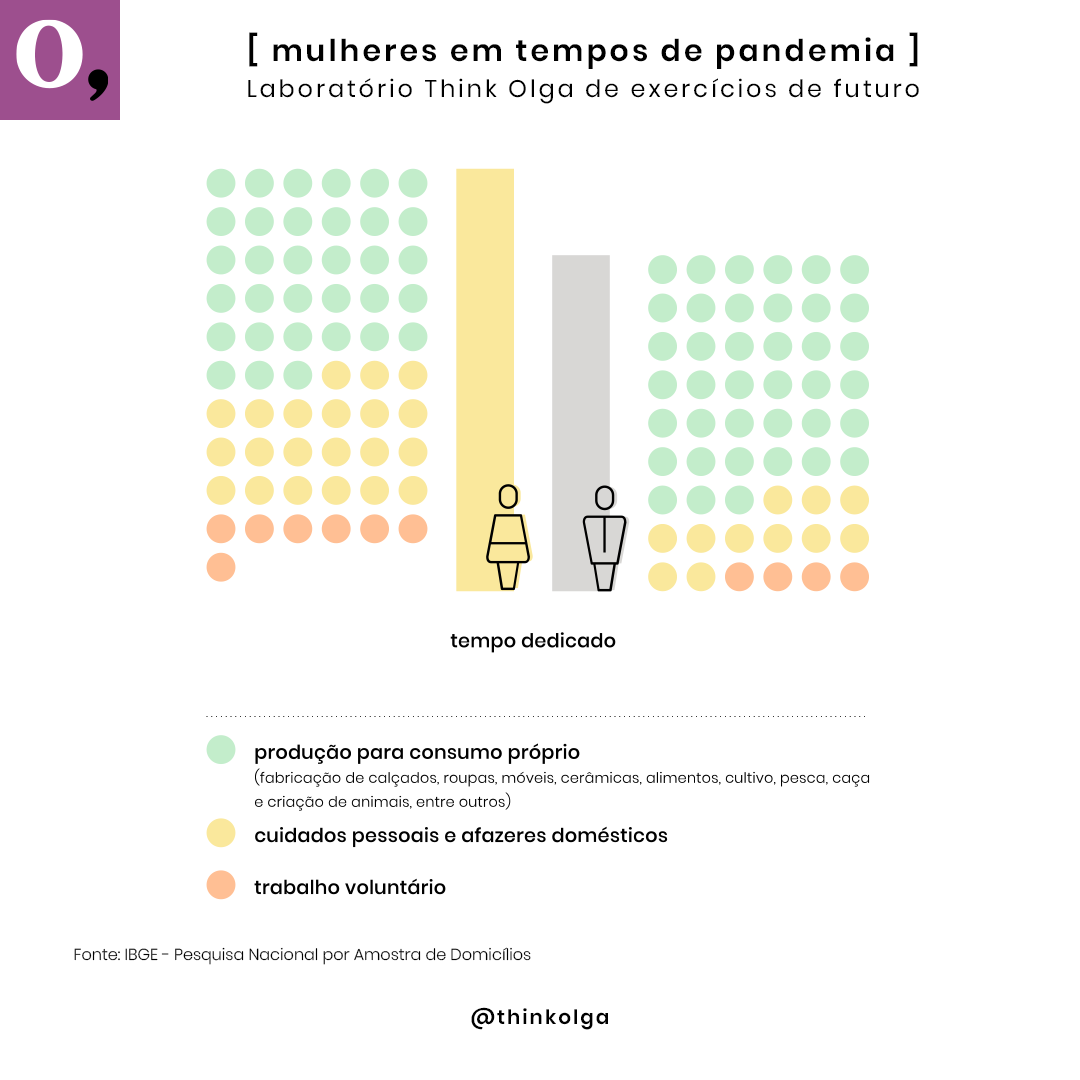

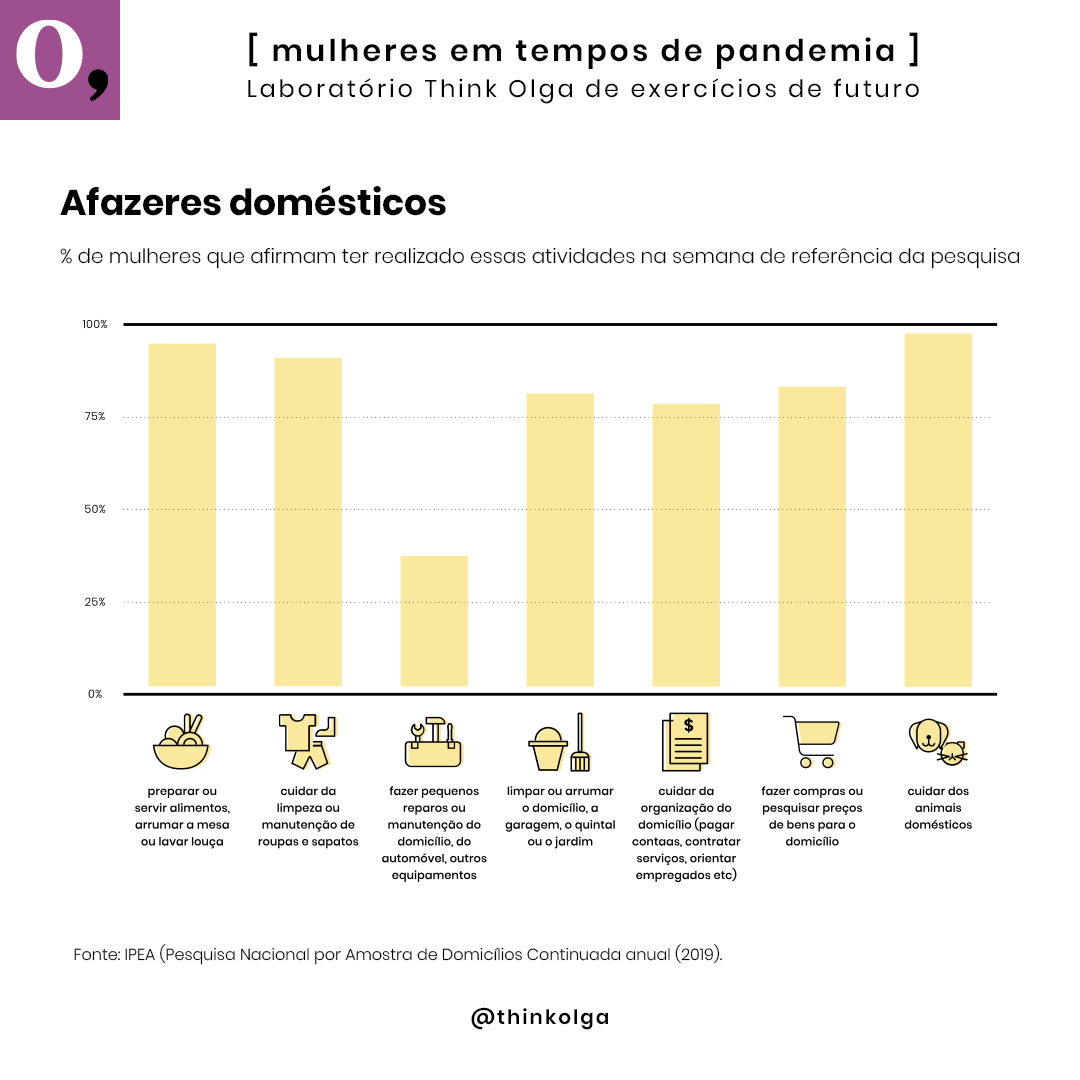

<small> Fonte: https://lab.thinkolga.com/economia-do-cuidado

## Desigualdade de gênero e afazeres domésticos

Buscando pela base de dados utilizada pelo Laboratório Think Olga, encontramos algumas tabelas-resumo no endereço: https://www.ibge.gov.br/estatisticas/multidominio/genero/20163-estatisticas-de-genero-indicadores-sociais-das-mulheres-no-brasil.html?=&t=downloads

Apesar desta base ser de 2016, não se espera que existam diferenças significativas para o objetivo desta análise. 

Dentro do contexto desta análise, as informações relevantes das tabelas-resumo foram sintetizadas em um único arquivo CSV e disponibilizado no endereço a seguir: https://github.com/alucatto/an_genero_enem/raw/main/GeneroRegiao.csv



In [25]:
fonte2 = "https://github.com/alucatto/an_genero_enem/raw/main/GeneroRegiao.csv"

gen_reg = pd.read_csv(fonte2)
gen_reg.head()

,Regiao,HorasM,HorasH,Creche,DesocupM,DesocupH,OcupCom3M,OcupCom3H,OcupSem3M,OcupSem3H
0,Brasil,20.9,11.1,30.4,31.3,24.1,54.4,88.7,65.8,83.6
1,Norte,19.4,10.5,14.4,33.3,19.8,47.7,87.3,61.5,84.0
2,Nordeste,21.8,11.0,27.2,35.9,27.4,44.3,83.7,57.1,77.8
3,Sudeste,21.4,11.4,35.9,32.8,26.7,58.9,90.3,69.2,84.8
4,Sul,19.9,11.0,38.0,21.7,17.0,63.6,92.8,73.4,88.4


Reproduzindo o gráfico de horas dedicadas a afazeres domésticos e cuidados feito pelo Think Olga, de maneira geral temos que no Nordeste as mulheres gastam cerca de o dobro de horas nestes afazeres, a mesma situação do Brasil como um todo.

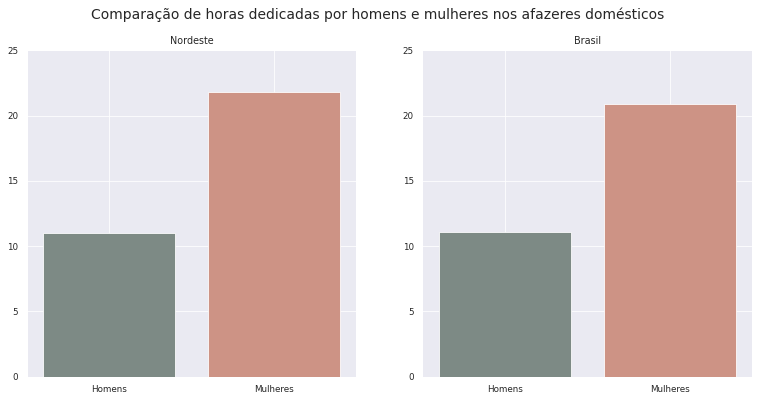

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle('Comparação de horas dedicadas por homens e mulheres nos afazeres domésticos', fontsize='x-large')

sns.barplot(x=['Homens', 'Mulheres'], y=[gen_reg['HorasH'][2], gen_reg['HorasM'][2]], ax=axs[0])
axs[0].set_title('Nordeste')
axs[0].set_ylim(0,25)
axs[0].grid()

sns.barplot(x=['Homens', 'Mulheres'], y=[gen_reg['HorasH'][0], gen_reg['HorasM'][0]], ax=axs[1])
axs[1].set_title('Brasil')
axs[1].set_ylim(0,25)
axs[1].grid()

Porém, comparando com cada uma das regiões do país, vemos que no Nordeste as mulheres dedicam ainda mais horas em afazeres do que a média em outras regiões.

Text(5, 19.799999999999997, 'Média brasileira')

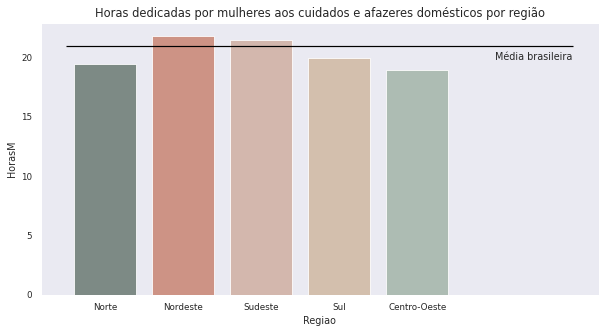

In [35]:
plt.figure(figsize=(10,5))
plt.title('Horas dedicadas por mulheres aos cuidados e afazeres domésticos por região', fontsize='large')
sns.barplot(x='Regiao', y='HorasM', data=gen_reg[1:])
plt.hlines(gen_reg['HorasM'][0], -0.5, 6)
plt.text(5, gen_reg['HorasM'][0]-1.1, 'Média brasileira')

E qual é o comportamento das horas dos homens em relação aos afazeres domésticos?

Text(5, 10.5, 'Média brasileira')

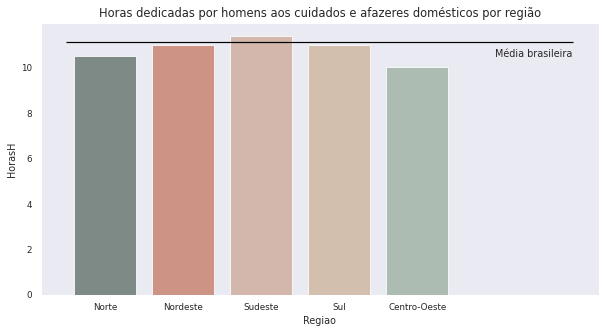

In [48]:
plt.figure(figsize=(10,5))
plt.title('Horas dedicadas por homens aos cuidados e afazeres domésticos por região', fontsize='large')
sns.barplot(x='Regiao', y='HorasH', data=gen_reg[1:])
plt.hlines(gen_reg['HorasH'][0], -0.5, 6)
plt.text(5, gen_reg['HorasH'][0]-0.6, 'Média brasileira')

Aqui vemos que os homens no Nordeste não apresentam a mesma tendência que as mulheres, e pelo contrário, estão ligeiramente abaixo da média brasileira.

Estes dados sugerem que, pelo fato de na Região Nordeste as mulheres dedicarem mais tempo aos afazeres domésticos que a média geral, elas provavelmente tem menos tempo disponível para outras atividades, incluindo para seus estudos, o que pode comprometer seus desempenhos no ENEM, evidenciado na diferença das notas do Grupo "Renda Baixa"

#Conclusão

A análise apresentada neste relatório indica que candidatos com rendas familiares mais baixas tendem a tirar notas mais baixas no ENEM. Dentro destas classes mais baixas foi possível notar uma desigualdade de notas de acordo com o gênero. Esta desigualdade de gênero, entretanto, não é vista nos grupos com renda familiar mais alta.

Além disso, este estudo também evidenciou que a diferença de classe econômica, notadamente para o grupo de mulheres marginalizadas no Grupo "Renda Baixa" da Bahia, tem maior influência nos resultados de suas provas, não sendo a renda necessariamente o fator decisivo para as notas mais baixas.

Para sustentar a conclusão foi apresentado também que na Região Nordeste as mulheres dedicam mais tempo aos afazeres domésticos que a média das mulheres brasileiras, o que possivelmente acarreta em menos tempo disponível para seus estudos. 

Portanto, o desempenho destas mulheres no ENEM 2019 pode ter ligação direta com o tempo insuficiente dedicado aos estudos, devido à desigualdade de gênero na dedicação a afazeres domésticos nas classes econômicas mais baixas.

Uma forma de combater este tipo de desigualdade é investir em políticas culturais e educacionais que diminuam papéis de gênero, ou seja, a associação de atividades específicas exclusivamente para mulheres ou homens.

## Trabalhos futuros

Para aprofundar esta análise é sugerido pesquisas adicionais utilizando os dados do link abaixo, onde se encontram bancos de dados com informações sobre formas de trabalho, município, Estado, gênero, entre outras.

https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_continua/Anual/Microdados/Visita

Adicionalmente, uma indagação que fica é que, independente do recorte de nota, por que mais mulheres prestaram o ENEM 2019? Talvez, as bases de dados aqui apontadas também apresentem respostas para esta indagação.


#Contato:

Amanda Lucatto Marra

Linkedin: https://www.linkedin.com/in/amandalucattomarra/